In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import random

In [147]:
columnames=["Abbrev", "Rep", "Locality", "Map_Ref", "Latitude", "Altitude", "Rainfall", "Frosts", "Year", "Sp", "PMCno", "DBH", "Ht", "Surv", "Vig", "Ins_res", "Stem_Fm", "Crown_Fm", "Brnch_Fm", "Utility"]
eucalyptus = pd.read_csv("eucalyptus.csv", names=columnames, header=None)
eucalyptus.head()

,Abbrev,Rep,Locality,Map_Ref,Latitude,Altitude,Rainfall,Frosts,Year,Sp,PMCno,DBH,Ht,Surv,Vig,Ins_res,Stem_Fm,Crown_Fm,Brnch_Fm,Utility
0,Cra,1,Central_Hawkes_Bay,N135_382/137,39__38,100,850,-2,1980,co,1520,18.45,9.96,40,4,3,3.5,4,3.5,good
1,Cra,1,Central_Hawkes_Bay,N135_382/137,39__38,100,850,-2,1980,fr,1487,13.15,9.65,90,4.5,4,3.5,3.5,3,best
2,Cra,1,Central_Hawkes_Bay,N135_382/137,39__38,100,850,-2,1980,ma,1362,10.32,6.5,50,2.3,2.5,3,3.5,3,low
3,Cra,1,Central_Hawkes_Bay,N135_382/137,39__38,100,850,-2,1980,nd,1596,14.8,9.48,70,3.7,3,3.3,4,3.5,good
4,Cra,1,Central_Hawkes_Bay,N135_382/137,39__38,100,850,-2,1980,ni,2088,14.5,10.78,90,4,2.7,3.3,3,3,good


In [148]:
eucalyptus = eucalyptus.drop(["Abbrev",  "Locality", "Map_Ref" ], axis=1)

In [149]:
eucalyptus.shape


(736, 17)

In [150]:
eucalyptus.groupby("Utility").size()

Utility
average    130
best       105
good       214
low        107
none       180
dtype: int64

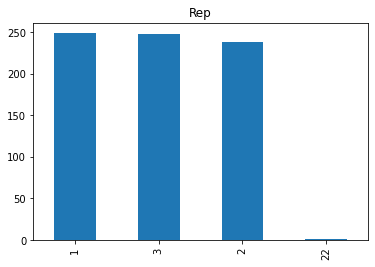

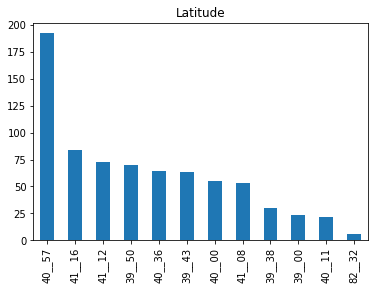

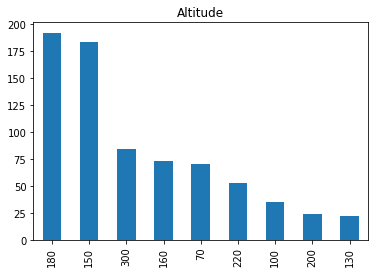

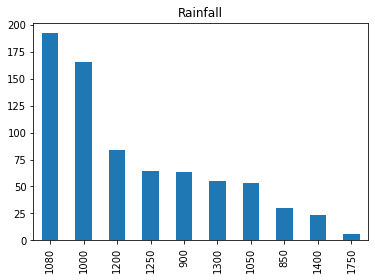

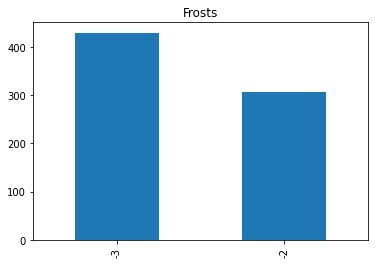

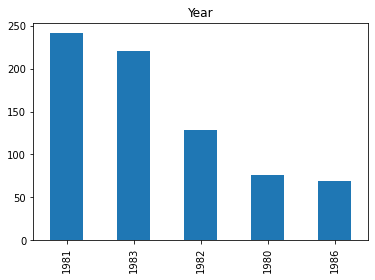

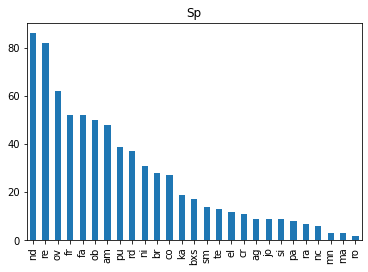

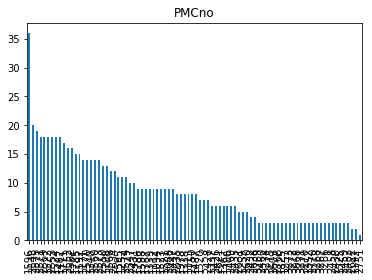

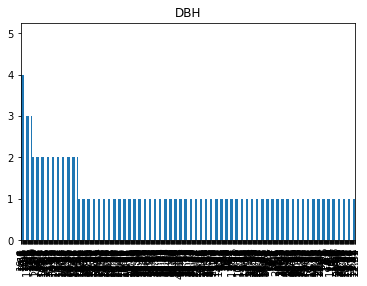

KeyboardInterrupt: ignored

In [101]:
for col in eucalyptus.columns:
    eucalyptus[col].value_counts().plot(kind="bar",title=col)
    plt.show()

In [151]:
missing_by_id = (eucalyptus == "?").sum(axis=1)

missing_by_id[missing_by_id >= 6]

for i, v in missing_by_id.items():
  if v >= 6:
    eucalyptus = eucalyptus.drop(axis=0,index=i)

In [152]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(eucalyptus["Latitude"])
list(le.classes_)
eucalyptus["Latitude"] = le.transform(eucalyptus["Latitude"])
le.fit(eucalyptus["Sp"])
list(le.classes_)
eucalyptus["Sp"] = le.transform(eucalyptus["Sp"])
le.fit(eucalyptus["Utility"])
list(le.classes_)
eucalyptus["Utility"] = le.transform(eucalyptus["Utility"])

In [153]:
eucalyptus = eucalyptus.replace("?", -1)

eucalyptus = eucalyptus.astype({"Surv": int}, errors='ignore') 
eucalyptus = eucalyptus.astype({"Vig": float}, errors='ignore') 
#eucalyptus = eucalyptus.astype({"Brnch_Fm": float}, errors='ignore')
#eucalyptus = eucalyptus.astype({"Crown_Fm": float}, errors='ignore')
#eucalyptus = eucalyptus.astype({"Stem_Fm": float}, errors='ignore')
#eucalyptus = eucalyptus.astype({"Ins_res": float}, errors='ignore')
eucalyptus = eucalyptus.astype({"Surv": float}, errors='ignore')
eucalyptus = eucalyptus.astype({"Ht": float}, errors='ignore')
eucalyptus = eucalyptus.astype({"DBH": float}, errors='ignore')
eucalyptus = eucalyptus.astype({"PMCno": int}, errors='ignore')
eucalyptus.dtypes

Rep           int64
Latitude      int64
Altitude      int64
Rainfall      int64
Frosts        int64
Year          int64
Sp            int64
PMCno         int64
DBH         float64
Ht          float64
Surv        float64
Vig         float64
Ins_res      object
Stem_Fm      object
Crown_Fm     object
Brnch_Fm     object
Utility       int64
dtype: object

In [154]:
from sklearn.model_selection import train_test_split

X= eucalyptus.iloc[:,1:]
y=eucalyptus["Utility"]
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.2)

In [155]:
y_train.value_counts()

2    171
0    104
4     89
3     85
1     84
Name: Utility, dtype: int64

In [156]:
y_test.value_counts()

2    43
0    26
4    22
3    22
1    21
Name: Utility, dtype: int64

In [157]:
eucalyptus.shape

(667, 17)

Decision Tree

In [136]:
from sklearn import tree

clf = tree.DecisionTreeClassifier() # defining decision tree classifier
clf=clf.fit(X_train,y_train) # train 
prediction = clf.predict(X_test) 

In [137]:
from sklearn import metrics

print("confusion matrix:",metrics.confusion_matrix(y_test,prediction))
print("accuracy:",metrics.accuracy_score(y_test,prediction))
print("precision:",metrics.precision_score(y_test,prediction, average = "macro"))
print("recall:",metrics.recall_score(y_test,prediction, average = "macro"))
print("F1:",metrics.f1_score(y_test,prediction, average = "macro"))

confusion matrix: [[26  0  0  0  0]
 [ 0 21  0  0  0]
 [ 0  0 43  0  0]
 [ 0  0  0 22  0]
 [ 0  0  0  0 36]]
accuracy: 1.0
precision: 1.0
recall: 1.0
F1: 1.0


[Text(0.625, 0.875, 'X[11] <= 3.5\ngini = 0.783\nsamples = 588\nvalue = [104, 84, 171, 85, 144]'),
 Text(0.5, 0.625, 'X[11] <= 1.5\ngini = 0.724\nsamples = 444\nvalue = [104, 84, 171, 85, 0]'),
 Text(0.25, 0.375, 'X[11] <= 0.5\ngini = 0.494\nsamples = 188\nvalue = [104, 84, 0, 0, 0]'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 104\nvalue = [104, 0, 0, 0, 0]'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 84\nvalue = [0, 84, 0, 0, 0]'),
 Text(0.75, 0.375, 'X[11] <= 2.5\ngini = 0.444\nsamples = 256\nvalue = [0, 0, 171, 85, 0]'),
 Text(0.625, 0.125, 'gini = 0.0\nsamples = 171\nvalue = [0, 0, 171, 0, 0]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 85\nvalue = [0, 0, 0, 85, 0]'),
 Text(0.75, 0.625, 'gini = 0.0\nsamples = 144\nvalue = [0, 0, 0, 0, 144]')]

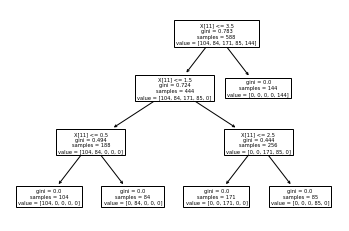

In [138]:
tree.plot_tree(clf)

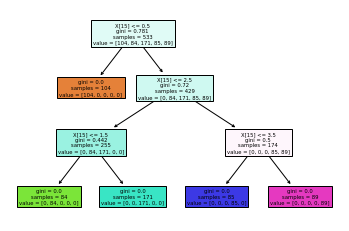

In [74]:
plt.figure()
tree.plot_tree(clf,filled=True)  
plt.savefig('tree.png',format='eps',bbox_inches = "tight")

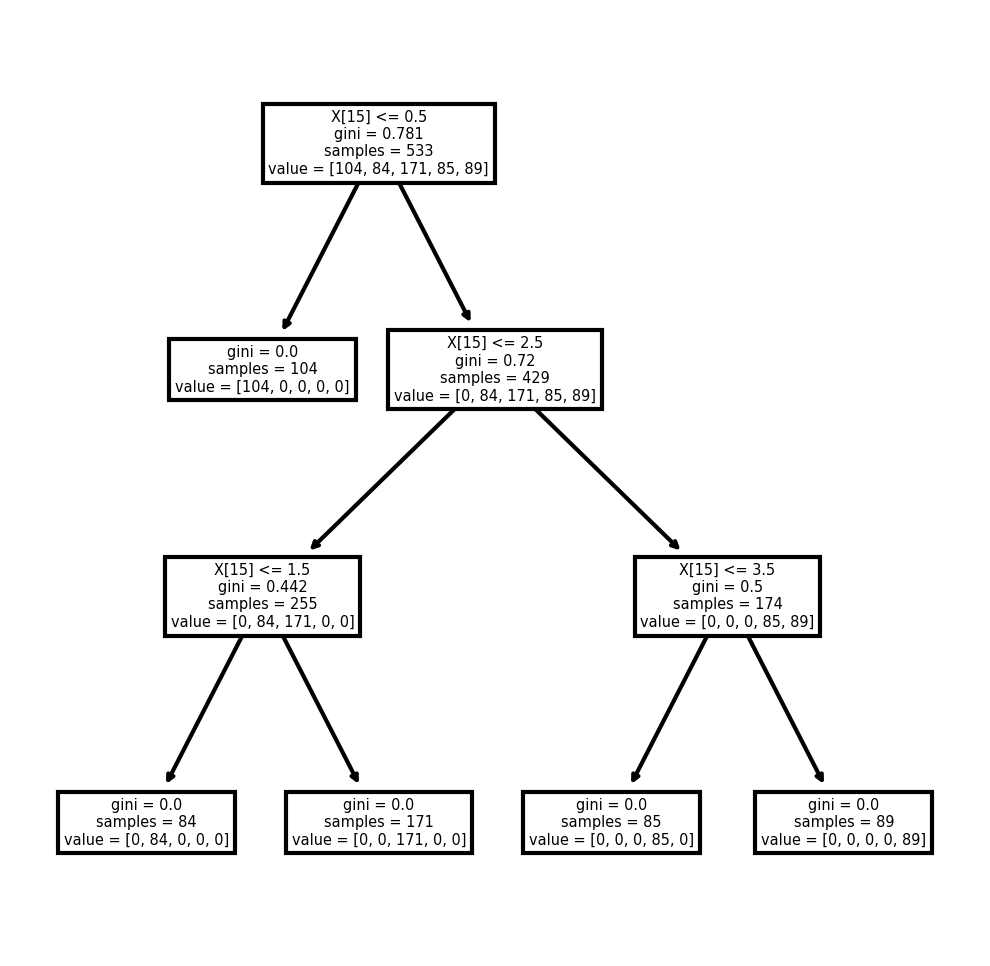

In [77]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf)
fig.savefig('imagename.png')

Randome forest


In [55]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
rf_prediction = clf.predict(X_test)

print("confusion matrix:",metrics.confusion_matrix(y_test,rf_prediction))
print("accuracy:",metrics.accuracy_score(y_test,rf_prediction))
print("precision:",metrics.precision_score(y_test,rf_prediction, average = "macro"))
print("recall:",metrics.recall_score(y_test,rf_prediction, average = "macro"))
print("F1:",metrics.f1_score(y_test,rf_prediction, average = "macro"))

confusion matrix: [[26  0  0  0  0]
 [ 0 21  0  0  0]
 [ 0  0 43  0  0]
 [ 0  0  0 22  0]
 [ 0  0  0  0 22]]
accuracy: 1.0
precision: 1.0
recall: 1.0
F1: 1.0


KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
knn.fit(X_train,y_train)

#Predict Output
knn_prediction= knn.predict(X_test) 

print("confusion matrix:",metrics.confusion_matrix(y_test,knn_prediction))
print("accuracy:",metrics.accuracy_score(y_test,knn_prediction))
#print("precision:",metrics.precision_score(y_test,knn_prediction))
#print("recall:",metrics.recall_score(y_test,knn_prediction))
#print("F1:",metrics.f1_score(y_test,knn_prediction))

confusion matrix: [[11  3  9  1  2]
 [ 6  3 12  0  0]
 [11  4 26  1  1]
 [10  1  5  5  1]
 [ 4  2  5  2  9]]
accuracy: 0.40298507462686567


In [56]:
knn = KNeighborsClassifier(n_neighbors=5,metric="hamming")

# Train the model using the training sets
knn.fit(X_train,y_train)

#Predict Output
knn_prediction2= knn.predict(X_test) 

print("confusion matrix:",metrics.confusion_matrix(y_test,knn_prediction2))
print("accuracy:",metrics.accuracy_score(y_test,knn_prediction2))
#print("precision:",metrics.precision_score(y_test,knn_prediction2))
#print("recall:",metrics.recall_score(y_test,knn_prediction2))
#print("F1:",metrics.f1_score(y_test,knn_prediction2))

confusion matrix: [[16  2  6  2  0]
 [ 0 19  2  0  0]
 [ 0  1 42  0  0]
 [ 4  2  0 15  1]
 [ 0  1  0  1 20]]
accuracy: 0.835820895522388


In [59]:
knn = KNeighborsClassifier(n_neighbors=20,metric="hamming")

# Train the model using the training sets
knn.fit(X_train,y_train)

#Predict Output
knn_prediction2= knn.predict(X_test) 

print("confusion matrix:",metrics.confusion_matrix(y_test,knn_prediction2))
print("accuracy:",metrics.accuracy_score(y_test,knn_prediction2))
#print("precision:",metrics.precision_score(y_test,knn_prediction2))
#print("recall:",metrics.recall_score(y_test,knn_prediction2))
#print("F1:",metrics.f1_score(y_test,knn_prediction2))

confusion matrix: [[15  2  8  0  1]
 [ 0 16  5  0  0]
 [ 0  2 41  0  0]
 [ 1  2  6 12  1]
 [ 0  0  3  0 19]]
accuracy: 0.7686567164179104
